In [2]:
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Load Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv(url, names=names)

In [12]:
print(df.loc[0]) # asa arata o linie din dataset
print('Shape of matrix:', df.shape) # vedem ce dimensiuni are matricea citita

id                        1000025
clump_thickness                 5
uniform_cell_size               1
uniform_cell_shape              1
marginal_adhesion               1
single_epithelial_size          2
bare_nuclei                     1
bland_chromatin                 3
normal_nucleoli                 1
mitoses                         1
class                           2
Name: 0, dtype: object
Shape of matrix: (699, 11)


In [17]:
df.replace('?', -99999, inplace=True) # python will ignore the missing data
df.drop(['id'], 1, inplace=True) # removing the id column because it doesn't help us in training the models

clump_thickness           5
uniform_cell_size         1
uniform_cell_shape        1
marginal_adhesion         1
single_epithelial_size    2
bare_nuclei               1
bland_chromatin           3
normal_nucleoli           1
mitoses                   1
class                     2
Name: 0, dtype: object


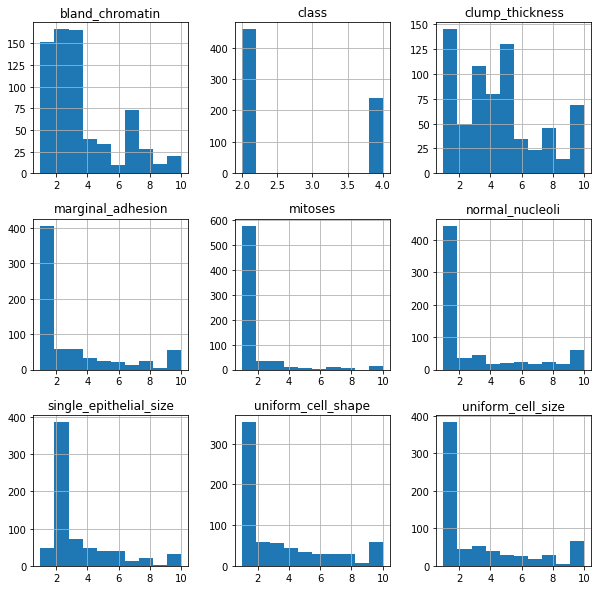

In [18]:
#histograms
df.hist(figsize = (10, 10))
plt.show()

In [20]:
# Create datasets for training

X = np.array(df.drop(['class'], 1)) # training_data
y = np.array(df['class']) #labels

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [27]:
models = [] # list which includes a knn model and a svm model
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = 8) #creating crossvalidation using kfold method
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy') #taking the results from cv based on the model
    results.append(cv_results) # appending the results into a results array
    names.append(name) # appending the names into a name array
    #print(cv_results)
    print('{}: mean = {}, standard_deviation = {}'.format(name, cv_results.mean(), cv_results.std()))

KNN: mean = 0.9713636363636363, standard_deviation = 0.018237276274431287
SVM: mean = 0.951720779220779, standard_deviation = 0.02651667324902668


In [29]:
#now we predict on the validation dataset

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))

KNN
0.9714285714285714
              precision    recall  f1-score   support

           2       0.97      0.99      0.98        92
           4       0.98      0.94      0.96        48

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140

SVM
0.9785714285714285
              precision    recall  f1-score   support

           2       1.00      0.97      0.98        92
           4       0.94      1.00      0.97        48

    accuracy                           0.98       140
   macro avg       0.97      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



In [39]:
# trying to predict on a random example
svm_model = SVC(gamma='auto')

svm_model.fit(X_train, y_train)

example_measures = np.array([[8,7,1,1,1,2,3,2,4]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = svm_model.predict(example_measures)
print(prediction)

[4]
